In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# **Data** **Loading**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project/Machine Learning/Smoking&Drinking/smoking_driking_dataset_Ver01.csv')
data

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


# **Exploring Dataset**

In [ ]:
data.shape

(991346, 24)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [ ]:
data.nunique()

,0
sex,2
age,14
height,13
weight,24
waistline,737
sight_left,24
sight_right,24
hear_left,2
hear_right,2
SBP,171


In [ ]:
data.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [ ]:
data.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

# **Data Cleaning**

In [ ]:
data.isna().sum()

,0
sex,0
age,0
height,0
weight,0
waistline,0
sight_left,0
sight_right,0
hear_left,0
hear_right,0
SBP,0


# **EXPLORATORY** **DATA** **ANALYSIS**


**Smoking** **Status** **Distribution**



In [ ]:
data['SMK_stat_type_cd'].value_counts()

,count
SMK_stat_type_cd,
1.0,602441
3.0,213954
2.0,174951


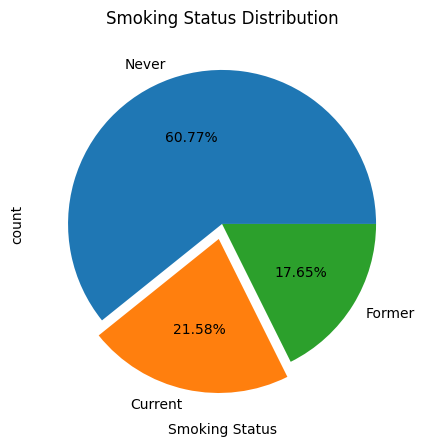

In [ ]:
plt.figure(figsize=(10,5))
values=['Never','Current','Former']
explode=[0,0.1,0]
data['SMK_stat_type_cd'].value_counts().plot.pie(autopct='%.2f%%',labels=values,explode=explode)
plt.xlabel('Smoking Status')
plt.title('Smoking Status Distribution')
plt.show()

**Drinking** **Distribution** **By** **Gender**

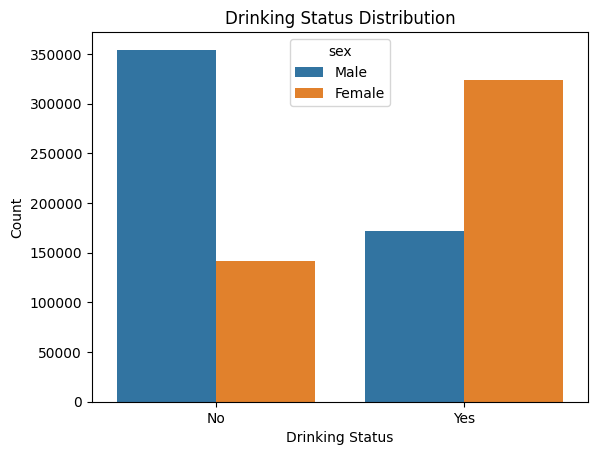

In [ ]:
plt.figure()
sns.countplot(x='DRK_YN',hue='sex',data=data)
plt.xticks([0,1],['No','Yes'])
plt.xlabel('Drinking Status')
plt.ylabel('Count')
plt.title('Drinking Status Distribution')
plt.show()

**Drinking** **According** **To** **Age**

In [ ]:
Drinking_age=data.groupby(['age','DRK_YN']).agg(Total=('age','count'))
Drinking_age.head()

Total
age DRK_YN       
20  N        7936
    Y       14035
25  N       21083
    Y       43287
30  N       26218

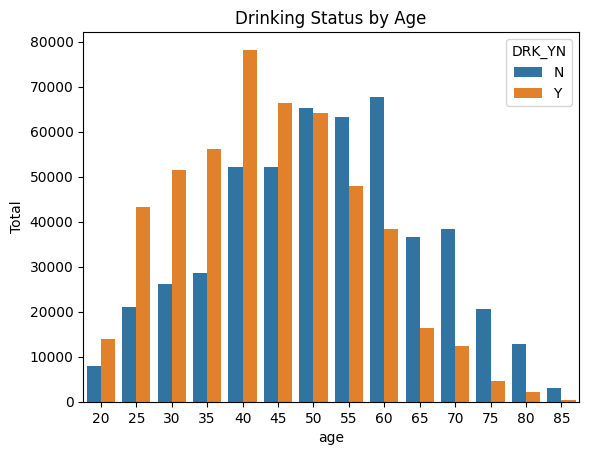

In [ ]:
sns.barplot(data=Drinking_age,x='age',y='Total',hue='DRK_YN')
plt.title('Drinking Status by Age')
plt.show()

**Smoking** **According** **To** **Age**


In [ ]:
data['SMK_stat_type_cd']=data['SMK_stat_type_cd'].replace([1,2,3],['No','Quit','Yes'])
Smoking_age=data.groupby(['age','SMK_stat_type_cd']).agg(Total=('age','count'))
Smoking_age.head()

Total
age SMK_stat_type_cd       
20  No                15334
    Quit               1228
    Yes                5409
25  No                42800
    Quit               5100

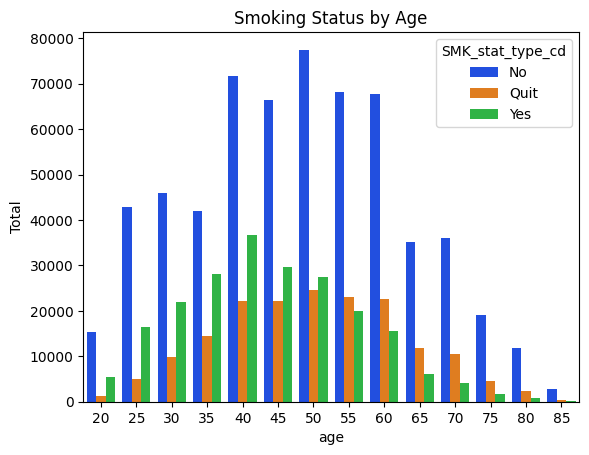

In [ ]:
sns.barplot(data=Smoking_age,x='age',y='Total',hue='SMK_stat_type_cd',palette='bright',hue_order=['No','Quit','Yes'])
plt.title('Smoking Status by Age')
plt.show()

# **MODEL TRAINING**

In [ ]:
data=data.drop(['sight_left','sight_right','hear_left','hear_right'],axis=1)
data

,sex,age,height,weight,waistline,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,No,Y
1,Male,30,180,80,89.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,Yes,N
2,Male,40,165,75,91.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,No,N
3,Male,50,175,80,91.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,No,N
4,Male,50,165,60,80.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,No,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,114.0,80.0,88.0,198.0,46.0,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,No,N
991342,Male,35,170,75,86.0,119.0,83.0,83.0,133.0,40.0,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,No,N
991343,Female,40,155,50,68.0,110.0,70.0,90.0,205.0,96.0,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,Yes,Y
991344,Male,25,175,60,72.0,119.0,74.0,69.0,122.0,38.0,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,No,N


In [ ]:
le=LabelEncoder()
data['DRK_YN']=le.fit_transform(data['DRK_YN'])
data['sex']=le.fit_transform(data['sex'])
data['SMK_stat_type_cd']=le.fit_transform(data['SMK_stat_type_cd'])
data

,sex,age,height,weight,waistline,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,0,1
1,1,30,180,80,89.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,2,0
2,1,40,165,75,91.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,0,0
3,1,50,175,80,91.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,0,0
4,1,50,165,60,80.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,45,175,80,92.1,114.0,80.0,88.0,198.0,46.0,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,0,0
991342,1,35,170,75,86.0,119.0,83.0,83.0,133.0,40.0,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,0,0
991343,0,40,155,50,68.0,110.0,70.0,90.0,205.0,96.0,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,2,1
991344,1,25,175,60,72.0,119.0,74.0,69.0,122.0,38.0,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,0,0


In [ ]:
x=data.drop(['DRK_YN'],axis=1)
y=data['DRK_YN']

In [ ]:
x

,sex,age,height,weight,waistline,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
0,1,35,170,75,90.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,0
1,1,30,180,80,89.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,2
2,1,40,165,75,91.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,0
3,1,50,175,80,91.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,0
4,1,50,165,60,80.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,45,175,80,92.1,114.0,80.0,88.0,198.0,46.0,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,0
991342,1,35,170,75,86.0,119.0,83.0,83.0,133.0,40.0,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,0
991343,0,40,155,50,68.0,110.0,70.0,90.0,205.0,96.0,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,2
991344,1,25,175,60,72.0,119.0,74.0,69.0,122.0,38.0,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,0


In [ ]:
y

,DRK_YN
0,1
1,0
2,0
3,0
4,0
...,...
991341,0
991342,0
991343,1
991344,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
Log_score=cross_val_score(LogisticRegression(),X=x,y=y,cv=5)
Random_score=cross_val_score(RandomForestClassifier(n_estimators=200),X=x,y=y,cv=5)
Tree_score=cross_val_score(DecisionTreeClassifier(max_depth=5),X=x,y=y,cv=5)
Nb_score=cross_val_score(GaussianNB(),X=x,y=y,cv=5)
Gradient_score=cross_val_score(GradientBoostingClassifier(),X=x,y=y,cv=5)
Ada_score=cross_val_score(AdaBoostClassifier(),X=x,y=y,cv=5)
Xg_score=cross_val_score(XGBClassifier(),X=x,y=y,cv=5)

In [ ]:
print(Log_score)
print(Random_score)
print(Tree_score)
print(Nb_score)
print(Gradient_score)
print(Ada_score)
print(Xg_score)

[0.71539819 0.71651645 0.71251683 0.71759075 0.71538667]
[0.73529026 0.73429533 0.73468873 0.73569242 0.73609087]
[0.71643214 0.71642566 0.71438298 0.71622896 0.7162794 ]
[0.69617693 0.69511623 0.69598374 0.69646289 0.69563573]
[0.73490695 0.73482491 0.73444159 0.73588408 0.73536458]
[0.72579815 0.72542354 0.7241021  0.72597834 0.72664915]
[0.73885106 0.73859756 0.73782588 0.73966682 0.73835042]


In [ ]:
print('Logistic Regression:',np.mean(Log_score))
print('Random Forest:',np.mean(Random_score))
print('Decision Tree:',np.mean(Tree_score))
print('GaussianNB:',np.mean(Nb_score))
print('Gradient Boost:',np.mean(Gradient_score))
print('AdaBoost:',np.mean(Ada_score))
print('XGBoost:',np.mean(Xg_score))

Logistic Regression: 0.7154817794025344
Random Forest: 0.7352115204189654
Decision Tree: 0.7159498293408066
GaussianNB: 0.6958751028381337
Gradient Boost: 0.7350844207546867
AdaBoost: 0.7255902578838305
XGBoost: 0.7386583491609262


In [ ]:
model=RandomForestClassifier(n_estimators=100,random_state=42)

In [ ]:
gscv=GridSearchCV(model,{'max_depth':[5,10,15,18,21]})
gscv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 18, 21]})

In [ ]:
gs_data=pd.DataFrame(gscv.cv_results_)
gs_data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,65.944609,0.635579,0.859917,0.009510,5,{'max_depth': 5},0.710370,0.710305,0.710601,0.709599,0.711017,0.710378,0.000463,5
1,111.920503,0.508270,2.009218,0.259049,10,{'max_depth': 10},0.730475,0.730322,0.730669,0.728916,0.730725,0.730221,0.000668,4
2,181.736422,1.602657,3.952619,0.264354,15,{'max_depth': 15},0.735953,0.734313,0.734464,0.733783,0.736021,0.734907,0.000911,3
3,208.683501,6.934261,5.279713,0.355615,18,{'max_depth': 18},0.736004,0.734350,0.735208,0.733897,0.736368,0.735165,0.000941,1
4,221.638103,2.844881,6.984941,0.232399,21,{'max_depth': 21},0.736275,0.734956,0.734376,0.733890,0.735334,0.734966,0.000819,2


In [ ]:
score=gscv.best_score_
score

0.7351653551001682

In [ ]:
y_pred=gscv.predict(x_test)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
pd.DataFrame({'True Y values':y_test,'Predicted Y Values':y_pred})

,True Y values,Predicted Y Values
676014,0,0
958905,0,1
472540,0,1
244194,1,1
88447,0,0
...,...,...
778854,1,1
81523,0,0
632475,0,1
96571,0,0


In [ ]:
precdiction1=gscv.predict([[1,50,175,80,91.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0]])
precdiction1

array([1])

In [ ]:
precdiction2=gscv.predict([[1,25,175,60,72.0,119.0,74.0,69.0,122.0,38.0,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,0	]])
precdiction2

array([0])

In [ ]:
precdiction3=gscv.predict([[1,35,170,75,86.0,119.0,83.0,83.0,133.0,40.0,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0]])
precdiction3

array([1])

In [ ]:
prediction4=gscv.predict([[1,50,175,80,91.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,0]])
prediction4

array([0])

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[71993, 27602],
       [24783, 73892]])

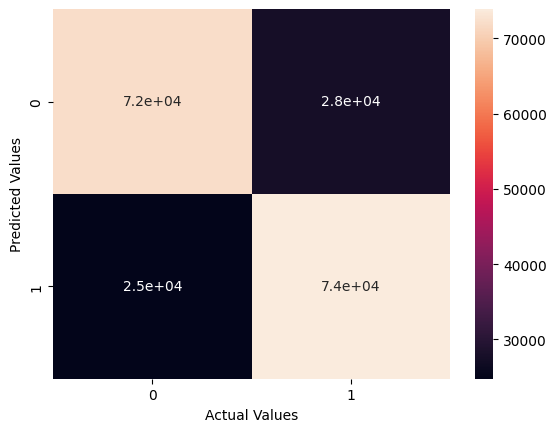

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# **CONCLUSION**

In [ ]:
data['DRK_YN'].value_counts()

,count
DRK_YN,
0,495858
1,495488


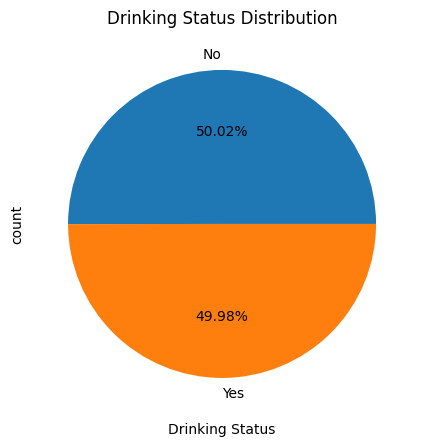

In [ ]:
plt.figure(figsize=(10,5))
data['DRK_YN'].value_counts().plot.pie(autopct='%.2f%%',labels=['No','Yes'])
plt.xlabel('Drinking Status')
plt.title('Drinking Status Distribution')
plt.show()